<a href="https://colab.research.google.com/github/SUNANUS/codezip/blob/main/Data_Visualization_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd

health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB2022/health_data.csv")

In [2]:
display(health.head()) 
print(health.info()) 

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [3]:
#데이터 전처리 1 - 추후 사용될 데이터인 수축기혈압,이완기혈압에 88개의 NA가 존재하므로, 전처리과정을 해준다.

# fillna()를 이용하여 결측치를 평균으로 대체 
mean_df1 = health['수축기혈압'].mean()
print(mean_df1)
mean_df2 = health['이완기혈압'].mean()
print(mean_df2)


health['수축기혈압']= health['수축기혈압'].fillna(health['수축기혈압'].mean())
health['이완기혈압']= health['이완기혈압'].fillna(health['이완기혈압'].mean())
print(health.isna().sum()) 


124.66969330104924
76.78974979822438
기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압             0
이완기혈압             0
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
dtype: int64


In [4]:
#전처리가 잘 되었는지 확인과정 1
len(health.loc[health['수축기혈압'] == 124.66969330104924])

88

In [5]:
#전처리가 잘 되었는지 확인과정 2
len(health.loc[health['이완기혈압'] == 76.78974979822438])

88

In [6]:
#데이터 전처리 2 - 흡연상태, 음주여부에 각각 2개, 1개의 NA가 존재하므로, 전처리과정을 해준다.
most_value_s = health['흡연상태'].value_counts(dropna=True).idxmax()
health['흡연상태'].fillna(most_value_s,inplace=True)

most_value_d = health['음주여부'].value_counts(dropna=True).idxmax()
health['음주여부'].fillna(most_value_d,inplace=True)

print(health.isna().sum()) 

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압             0
이완기혈압             0
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              0
음주여부              0
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
dtype: int64


In [7]:
%matplotlib inline
import seaborn as sns  

sns.set_style("whitegrid")

In [8]:
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq        

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)                               

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}") 
#nanum_font

sys_font number: 48
['/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/sh

In [9]:
import matplotlib.font_manager as fm  
import matplotlib as mpl               
import matplotlib.pyplot as plt 

mpl.rcParams['axes.unicode_minus'] = False  

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)

NanumGothic Eco


In [10]:
sns.set(font="NanumGothic Eco", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

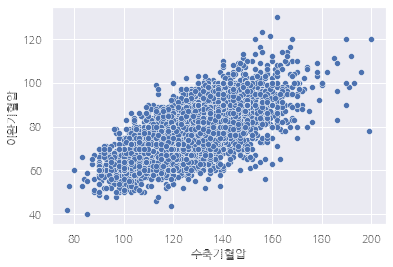

In [11]:
#1. 산점도를 사용하여 수축기혈압과 이완기혈압 관계 살펴보기
#graph1
fm._rebuild()
sns.scatterplot(data = health, x = '수축기혈압', y = '이완기혈압')

In [12]:
#2. 막대그래프를 활용하여 성별코드 별, 체중별, 음주여부별로 허리 둘레 비교
#graph2,3,4

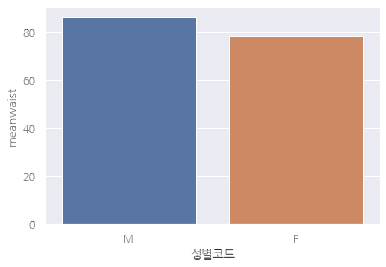

In [13]:
#graph2 - 성별코드별 허리둘레
df_health = health.groupby('성별코드' , as_index = False).agg( meanwaist = ('허리둘레', 'mean'))
df_health = df_health.sort_values('meanwaist', ascending = False)

sns.barplot(data = df_health, x = '성별코드', y = 'meanwaist')

In [14]:
health.describe()

,기준년도,가입자일련번호,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,2020.0,5000.50000,34.100100,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,...,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.325100,0.175331,0.579514
std,0.0,2886.89568,12.394581,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,...,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.468436,0.380308,0.591269
min,2020.0,1.00000,11.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,...,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,2020.0,2500.75000,27.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,...,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,2020.0,5000.50000,41.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,...,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,2020.0,7500.25000,44.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,...,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,0.000000,1.000000
max,2020.0,10000.00000,49.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,...,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,2.000000


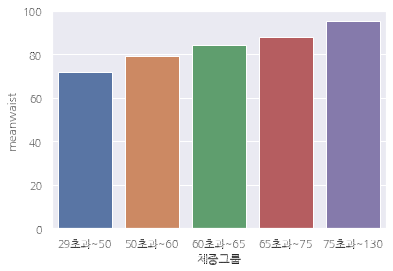

In [15]:
#graph3 - 체중별 허리둘레
df_buffer = health
df_buffer['체중그룹'] = pd.qcut(df_buffer['체중(5Kg 단위)'], 5, labels = ['29초과~50', '50초과~60', '60초과~65','65초과~75','75초과~130'])

df_health2 = df_buffer.groupby('체중그룹' , as_index = False).agg( meanwaist = ('허리둘레', 'mean'))
df_health2 = df_health2.sort_values('meanwaist', ascending = False)

sns.barplot(data = df_health2, x = '체중그룹', y = 'meanwaist')

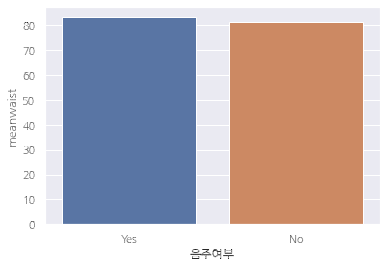

In [16]:
#graph4 - 음주여부별 허리둘레
df_health3 = health.groupby('음주여부' , as_index = False).agg( meanwaist = ('허리둘레', 'mean'))
df_health3 = df_health3.sort_values('meanwaist', ascending = False)

sns.barplot(data = df_health3, x = '음주여부', y = 'meanwaist')

In [17]:
health.describe()

,기준년도,가입자일련번호,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,2020.0,5000.50000,34.100100,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,...,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.325100,0.175331,0.579514
std,0.0,2886.89568,12.394581,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,...,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.468436,0.380308,0.591269
min,2020.0,1.00000,11.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,...,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,2020.0,2500.75000,27.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,...,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,2020.0,5000.50000,41.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,...,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,2020.0,7500.25000,44.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,...,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,0.000000,1.000000
max,2020.0,10000.00000,49.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,...,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,2.000000


[(9.0, 18.0)]

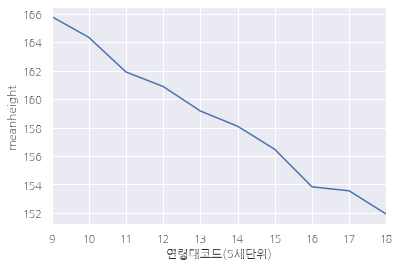

In [18]:
# 3. 선그래프를 활용하여 연령대 별 신장 비교
# graph5

#연령대 코드가 9-18까지 존재하므로 (describe를 통해 확인) 그래프가 표시하는 범위를 조정해준다.
ageheight = health.groupby('연령대코드(5세단위)' , as_index = False).agg( meanheight = ('신장(5Cm단위)', 'mean'))
sns.lineplot(data = ageheight, x = '연령대코드(5세단위)', y = 'meanheight').set(xlim = (9, 18))

In [22]:
# insight 도출하기 - 1
# graph1을 살펴보면, 산점도의 점들의 분포가 우상향하는 모습을 보이므로 두 변수간 '양의 상관관계'가 있음을 확인할 수 있었다. 
# 즉 수축기혈압이 높다면, 이완기혈압도 높을것이라 추정할 수 있다.
# 수축기혈압은 '검진자의 최고혈압'을 의미하고, 이완기혈압은 '검진자의 최저혈압'을 의미한다.
# 따라서 위에서 분석한 관계성에 따라 다시 보게되면 심장 수축시 나타나는 최고혈압이 높은 사람은, 심장 이완시 나타나는 최저혈압도 높을 것이라고 할 수 있다.


In [20]:
# nsight 도출하기 - 2
# 허리둘레에 영향을 미칠 것 같은 속성들 중 일부('성별코드', '체중', '음주여부')와 허리둘레의 관계성을 막대그래프를 통해 살펴보았다.
# graph2,3,4를 통해 남성과 여성중에는 남성이 허리둘레가 더 크고, 체중의 경우 체중이 높은 그룹일수록 허리둘레가 큰 값을 취함을 확인 할 수 있었다. 
# 또한 음주여부는 Yes라고 대답한 편의 허리둘레가 더 큼을 알 수 있었다.
# 다시 정리해보면, '성별이 기준일 때는 남성이, 체중이 기준일때는 체중이 높을수록, 음주가 기준일 때는 음주를 할 수록 허리둘레가 클 것이다'라는 결론을 낼 수 있었다.
# 추가로 체중이 기준일때, 허리둘레의 차이가 가장 유의미함(차이가 많이 남)을 확인할 수 있었다. 
# 따라서 허리둘레에 가장 큰 영향을 미치는 변수는 '체중'임을 도출해낼 수 있다.

In [23]:
#insight 도출하기 - 3
# graph5를 보면, 연령대 코드가 높을수록, 즉 나이가 많을 수록 평균 신장이 작아짐을 확인할 수 있었다.